 #### Necessary Libraries

In [1]:
import pandas as pd
import os

#### Merging 12 Months of Data into One

In [2]:
#Read the files names

path = './data'
for file in os.listdir(path):
    if not file.startswith('.'):
        files = os.listdir(path) 
        

#Merge the file into one
sales_data = pd.DataFrame()

for file in files:
    file_data = pd.read_csv(path + '/'+ file, sep =',')
    sales_data = pd.concat([sales_data, file_data])
    
sales_data.to_csv(path+'/sales_data.csv', index=False)

#### Read the combined data to sdata Data Frame

In [3]:
sdata = pd.read_csv(path+'/sales_data.csv', sep = ',')
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Clean the Data

##### Task 1: Drop Rows of NAN

In [5]:
# Finding the NAN rows
Nan_rows = sdata[sdata.isna().any(axis = 1 )]
display(Nan_rows.shape)

#Dropping the NAN rows
sdata.dropna(how='all', axis=0, inplace = True)

(0, 6)

##### Task 2: Find 'Or' and Delete it

In [6]:
or_rows = sdata[sdata['Order Date'].str[0:2] == 'Or']

sdata = sdata[sdata['Order Date'].str[0:2] != 'Or']

##### Cast Columns to Correct Type

In [7]:
sdata['Quantity Ordered'] = pd.to_numeric(sdata['Quantity Ordered'])
sdata['Price Each'] = pd.to_numeric(sdata['Price Each'])

 #### Add Additional Necessary Columns

###### Task 1: Add Month Column

In [8]:
sdata['Month'] = sdata['Order Date'].str[0:2]
sdata['Month'] = sdata['Month'].astype(int)

sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


###### Alternative

In [9]:
sdata['Month 2'] = pd.to_datetime(sdata['Order Date']).dt.month
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,10


###### Add a Sales Column

In [10]:
sdata['Revenue'] = sdata['Quantity Ordered'].astype('int') * sdata['Price Each'].astype('float')

###### Add a City Column

In [11]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sdata['City'] = sdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

##### Question 1: What was the best month for sales?How much was earned in that month?

In [12]:
month_sales = sdata.groupby(['Month']).sum()
month_sales.drop(['Month 2'], axis = 1, inplace=True)
month_sales.reset_index(inplace=True)

#Sorting Revenue from highest to lowest
month_sales.sort_values(by=['Revenue'], axis=0, ascending=False)


,Month,Quantity Ordered,Price Each,Revenue
11,12,112456,1.835366e+07,1.845377e+07
9,10,90812,1.486222e+07,1.494691e+07
3,4,82232,1.347068e+07,1.356268e+07
10,11,79192,1.272240e+07,1.279841e+07
4,5,74668,1.254050e+07,1.261043e+07
2,3,68020,1.116483e+07,1.122840e+07
6,7,64288,1.053016e+07,1.059110e+07
5,6,61012,1.024810e+07,1.031121e+07
7,8,53792,8.921382e+06,8.977872e+06
1,2,53796,8.755539e+06,8.808090e+06


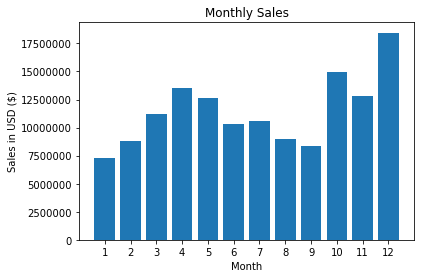

In [13]:
# Importing the pyplot namespace
import matplotlib.pyplot as plt  

plt.bar(month_sales['Month'], month_sales['Revenue'])

plt.title('Monthly Sales')

plt.xticks(month_sales['Month'])
plt.xlabel('Month')

plt.ylabel('Sales in USD ($)')

# Removes Scientific notation
plt.ticklabel_format(style='plain')

plt.show()

##### Question 2:  What city sold the most product?

In [14]:
city_sales = sdata.groupby(['City']).sum()

city_sales.reset_index(inplace=True)
city_sales.drop(['Month 2'], axis = 1, inplace=True)

display(city_sales.sort_values(by=['Revenue'], ascending= False))

,City,Quantity Ordered,Price Each,Month,Revenue
8,San Francisco (CA),200956,3.284585e+07,1262080,3.304882e+07
4,Los Angeles (CA),133156,2.168574e+07,833300,2.181028e+07
5,New York City (NY),111728,1.854148e+07,702964,1.865727e+07
2,Boston (MA),90112,1.454964e+07,564448,1.464657e+07
0,Atlanta (GA),66408,1.111963e+07,419176,1.118199e+07
3,Dallas (TX),66920,1.101051e+07,418480,1.107190e+07
9,Seattle (WA),66212,1.093318e+07,419764,1.099102e+07
7,Portland (OR),45212,7.442233e+06,282484,7.482929e+06
1,Austin (TX),44612,7.239494e+06,279316,7.278327e+06
6,Portland (ME),11000,1.788757e+06,68576,1.799033e+06


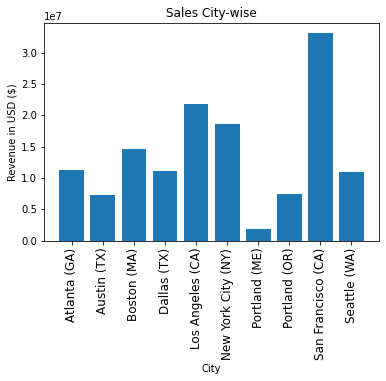

In [15]:
plt.bar(city_sales['City'], city_sales['Revenue'])

plt.title('Sales City-wise')

plt.xticks(city_sales['City'], rotation = 'vertical', size=12)
plt.xlabel('City')
plt.ylabel('Revenue in USD ($)')

plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
# Create a hour column
sdata['Hour'] = pd.to_datetime(sdata['Order Date']).dt.hour
sdata['Count'] = 1

sdata.groupby(['Hour']).count()['Count']

Hour
0     15640
1      9400
2      4972
3      3324
4      3416
5      5284
6      9928
7     16044
8     25024
9     34992
10    43776
11    49644
12    50348
13    48516
14    43936
15    40700
16    41536
17    43596
18    49120
19    51620
20    48912
21    43684
22    35288
23    25100
Name: Count, dtype: int64

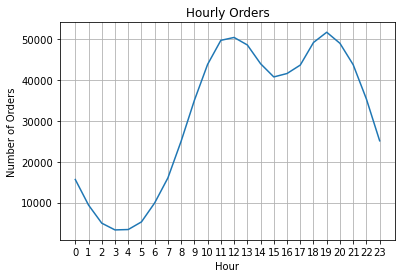

In [17]:
#Plotting Hourly Orders Line Graph
keys = [pair for pair, df in sdata.groupby(['Hour'])]

plt.plot(keys, sdata.groupby(['Hour']).count()['Count'])

plt.title('Hourly Orders')

plt.xticks(keys)
plt.xlabel('Hour')

plt.ylabel('Number of Orders')

plt.grid()

plt.show()

# Before the Peak Hours(11am and 7pm)

##### Question 4: What products are most often sold together?

In [18]:
# Creating a DataFrame with Products Appearing on similar orders
ID_data = sdata[sdata.duplicated('Order ID', keep=False)]

ID_data['2Products'] = ID_data.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
Prodp = ID_data[['Order ID', '2Products']].drop_duplicates()

Prodp

,Order ID,2Products
0,259358,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."
1,259359,"27in 4K Gaming Monitor,27in 4K Gaming Monitor,..."
2,259360,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
3,259361,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,259362,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...
661457,248146,"Bose SoundSport Headphones,Bose SoundSport Hea..."
661458,248147,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
661459,248148,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
661460,248149,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Prodp['2Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(20):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 132186
('Lightning Charging Cable', 'Lightning Charging Cable') 130812
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 124614
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 124022
('Wired Headphones', 'Wired Headphones') 113852
('Apple Airpods Headphones', 'Apple Airpods Headphones') 93678
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 80382
('27in FHD Monitor', '27in FHD Monitor') 45186
('iPhone', 'iPhone') 41084
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 37460
('34in Ultrawide Monitor', '34in Ultrawide Monitor') 37198
('Google Phone', 'Google Phone') 33198
('Flatscreen TV', 'Flatscreen TV') 28896
('Macbook Pro Laptop', 'Macbook Pro Laptop') 28392
('ThinkPad Laptop', 'ThinkPad Laptop') 24800
('20in Monitor', '20in Monitor') 24654
('Vareebadd Phone', 'Vareebadd Phone') 12390
('iPhone', 'Lightning Charging Cable') 10110
('Google Phone', 'USB-C Charging Cable') 9942
('Lightning Charging Cable', 'iPhone') 61

##### Question 5: What product sold the most? Why do you think it sold the most?

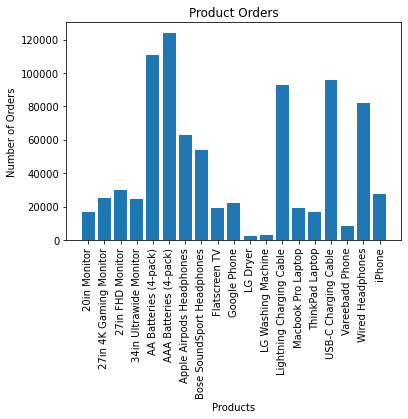

In [20]:
prod_sales = sdata.groupby(['Product'])
prod_orders = prod_sales.sum()['Quantity Ordered']

keys = [pair for pair, df in prod_sales]

plt.bar(keys, prod_orders)
plt.title('Product Orders')

plt.xticks(keys, rotation='vertical', size=10)
plt.xlabel('Products')

plt.ylabel('Number of Orders')

plt.show()

<ipython-input-21-81a59f021795>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


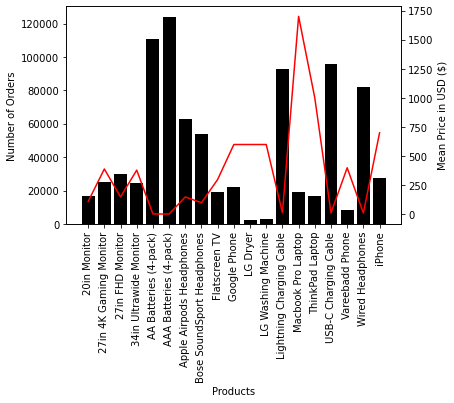

In [21]:
prices = sdata.groupby(['Product']).mean()['Price Each']

fig, ab1 = plt.subplots()

ab2 = ab1.twinx()

ab1.bar(keys, prod_orders, color='black')
ab2.plot(keys, prices, color = 'red')

ab1.set_xticklabels(keys, rotation='vertical', size=10)
ab1.set_xlabel('Products')

ab1.set_ylabel('Number of Orders')
ab2.set_ylabel('Mean Price in USD ($)')

fig.show()